In [304]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import LinearModel
%matplotlib inline

 # **For Graphite:**

## Part 1: Look at your data set

In [305]:
gr_data = pd.read_csv('graphite.csv')
gr_data11 = pd.read_csv('graphite11.csv')
gr_data

,voltage,diameter
0,4104,3.06928
1,4496,2.99112
2,4981,2.77846
3,5516,2.73106
4,6002,2.48920
5,6510,2.39168
6,7058,2.32656
7,7545,2.21622
8,8073,2.13242


In [306]:
gr_data11

,voltage,diameter
0,4104,5.2744
1,4496,5.1640
2,4981,4.8122
3,5516,4.7128
4,6002,4.2882
5,6510,4.1160
6,7058,3.9978
7,7545,3.8116
8,8073,3.6682


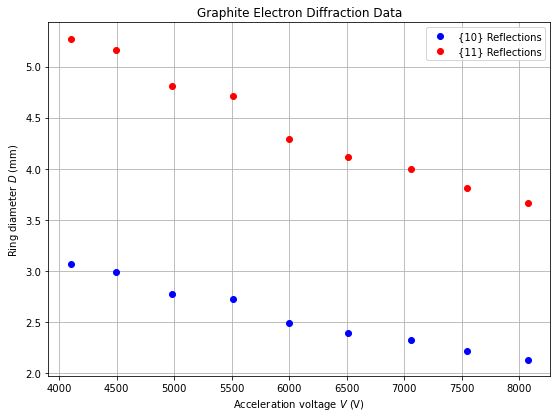

In [307]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('Graphite Electron Diffraction Data')
plt.ylabel(r'Ring diameter $D$ (mm)')
plt.xlabel(r'Acceleration voltage $V$ (V)')
plt.plot(gr_data['voltage'],gr_data['diameter'],'ob',label='{10} Reflections')
plt.plot(gr_data11['voltage'],gr_data11['diameter'],'or',label='{11} Reflections')
plt.legend()

## Part 2: Transform (linearize) the data

In [308]:
l = 18.06
sine = np.sin(np.arctan(np.copy(gr_data['diameter'])/(2*l))/2)
sine11 = np.sin(np.arctan(np.copy(gr_data11['diameter'])/(2*l))/2)

De Broglie relationship gives $\lambda = h/\sqrt{2mE}$, where we know in eV for electrons we have $E=e*V$, which has the same number as V in Volts. And from the lattice equation $\sin \theta = \sqrt{h^2+k^2+hk}(\frac{\lambda}{\sqrt{3a}})$. For h=1 and k=0, this reduces to $\sin \theta = \frac{\lambda}{\sqrt{3}a} = \frac{h/\sqrt{2m*e*V}}{\sqrt{3}a}$; for h=1 and k=1, this reduces to $\sin \theta = \frac{\lambda}{a} = \frac{h/\sqrt{2m*e*V}}{a}$. Therefore, we have $\sin \theta$ as a linear function of $ \frac{1}{\sqrt {e*V}}$. So we first find $\frac{1}{\sqrt {e*V}}$ below:

In [309]:
svoltage = 1/np.sqrt(np.copy(gr_data['voltage']))

Then we can plot the transformed data to see a linear relationship:

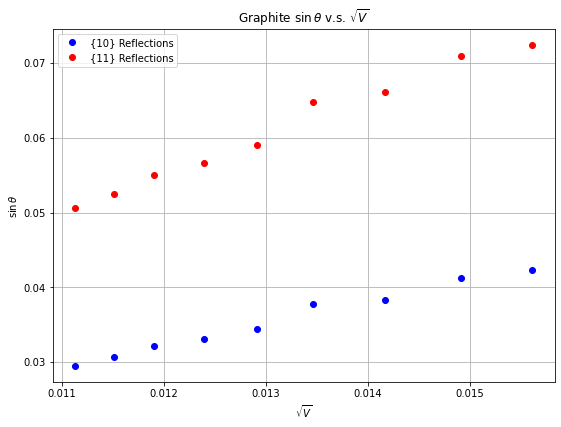

In [310]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('Graphite $\sin$$\\theta$ v.s. $\sqrt{V}$')
plt.ylabel(r'$\sin {\theta}$')
plt.xlabel(r'$\sqrt{V}$')
plt.plot(svoltage,sine,'ob',label='{10} Reflections')
plt.plot(svoltage,sine11,'or',label='{11} Reflections')
plt.legend()

## Part 3: Fit the linearized data

{10}:

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 2.3924e-06
    reduced chi-square = 3.4177e-07
    Akaike info crit   = -132.263938
    Bayesian info crit = -131.869489
    R-squared          = 0.98612152
[[Variables]]
    slope:      2.97291245 +/- 0.13330263 (4.48%) (init = 2.972912)
    intercept: -0.00348019 +/- 0.00175864 (50.53%) (init = -0.003480191)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.994

Slope =  2.972912451343627 +/- 0.1333026343244336


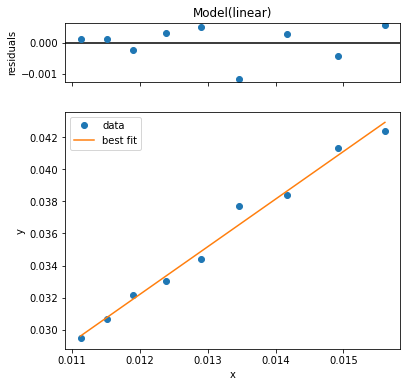

In [311]:
line = LinearModel()
param_guess = line.guess(sine, x = svoltage)
line_fit = line.fit(sine, param_guess, x = svoltage)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
s = line_fit.params['slope'].value
line_fit.plot();

{11}:

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 7.8618e-06
    reduced chi-square = 1.1231e-06
    Akaike info crit   = -121.556435
    Bayesian info crit = -121.161986
    R-squared          = 0.98453245
[[Variables]]
    slope:      5.10078580 +/- 0.24164829 (4.74%) (init = 5.100786)
    intercept: -0.00595172 +/- 0.00318802 (53.56%) (init = -0.005951719)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.994

Slope =  5.1007858005769595 +/- 0.2416482884179538


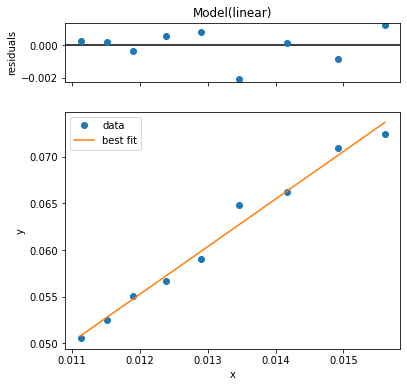

In [312]:
line = LinearModel()
param_guess = line.guess(sine11, x = svoltage)
line_fit = line.fit(sine11, param_guess, x = svoltage)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
s11 = line_fit.params['slope'].value
line_fit.plot();

## Part 4: Evaluate the fit constants

Then we can extract the slope, which from the analysis above for {10} we know is $\frac{h/\sqrt{2m}}{\sqrt{3}a}$, so we have $a=\frac{h/\sqrt{2m}}{\sqrt{3}s}$, where s is the slope from the fit.

For {10} we get:

In [313]:
m = const.value(u'electron mass energy equivalent in MeV')*1.0e6 # eV
h = const.value(u'Planck constant in eV s')*const.speed_of_light*1.0e10 # eV-A
a = h/np.sqrt(2*m)/(np.sqrt(3)*s)# unit is in angstrom
print(a)

2.3817632281787544


For {11} we get from the analysis above that the slope is $\frac{h/\sqrt{2m}}{a}$, so we have $a=\frac{h/\sqrt{2m}}{s}$, where s is the slope from the fit.

In [314]:
a11 = h/np.sqrt(2*m)/(s11)# unit is in angstrom
print(a11)

2.4043863117290787


We can see that these two numbers are very close to the known value of a for graphite, which is 2.46. Maximum relative error is only (2.46-2.38) / 2.46 = 3.25%.

Finally, as mentioned above, we know DeBroglie relationship gives $\lambda = h/\sqrt{2mE}$, where we know in eV for electrons we have $E=e*V$, which has the same number as V in Volts. This gives the relationship between wavelength and $\frac{1}{\sqrt {e*V}}$ in eV. Therefore, the proportionality for this linear relationship between $\lambda $ and $\frac{1}{\sqrt {e*V}}$ is $h/\sqrt{2m}$, which is s*a from the relation above for {11} and is $\sqrt 3$*s*a for {10}

In [315]:
a_gr = 2.46
factor = np.sqrt(3)*s*a_gr
factor11 = s11*a_gr
print(factor)
print(factor11)

12.667119113965997
12.54793306941932


We have this "conversion constant" as 12.667 [angstrom * $\sqrt{eV}$] and 12.548 [angstrom * $\sqrt{eV}$] as calculated from {1,0} and {1,1},respectively.

-------------------------------------------

# **For Alumunum:**

## Part 1: Look at the data set:

In [316]:
al_data = pd.read_csv('aluminum.csv')
al_data

,voltage,diameter1,diameter2,diameter3,diameter4,diameter5
0,4.503,2.666,3.047,4.398,5.236,7.039
1,4.964,2.512,2.935,4.140,4.924,6.597
2,5.954,2.249,2.648,3.737,4.440,5.908
3,6.515,2.150,2.552,3.565,4.220,5.640
4,7.054,2.079,2.430,3.440,3.893,5.467
5,7.539,1.998,2.356,3.300,3.909,5.225
6,8.085,1.951,2.294,3.198,3.802,5.058


plot one ring

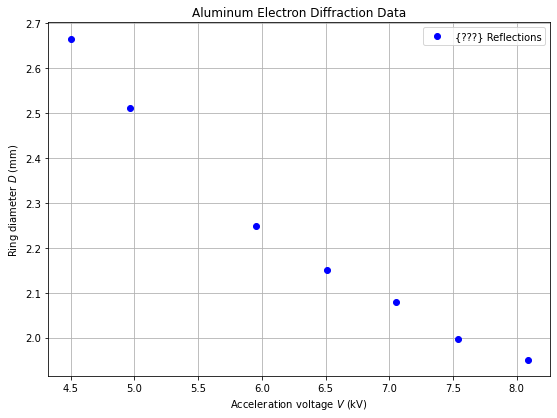

In [317]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('Aluminum Electron Diffraction Data')
plt.ylabel(r'Ring diameter $D$ (mm)')
plt.xlabel(r'Acceleration voltage $V$ (kV)')
plt.plot(al_data['voltage'],al_data['diameter1'],'ob',label='{???} Reflections')
plt.legend()

plot another ring

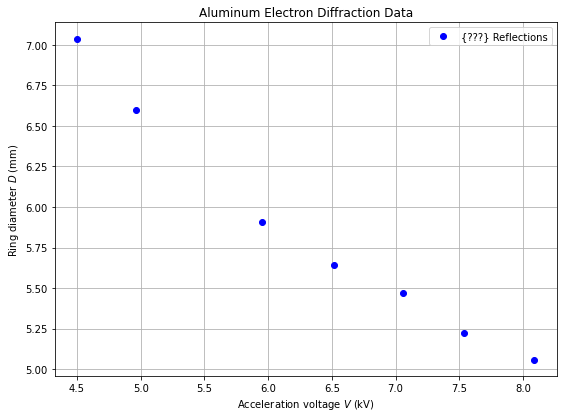

In [318]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('Aluminum Electron Diffraction Data')
plt.ylabel(r'Ring diameter $D$ (mm)')
plt.xlabel(r'Acceleration voltage $V$ (kV)')
plt.plot(al_data['voltage'],al_data['diameter5'],'ob',label='{???} Reflections')
plt.legend()

## Part 2: Convert D to $\sin \theta$

extract all the five rings out in separate arrarys annd convert them from diameters to $\sin \theta$:

In [319]:
l = 18.06
ring1 = np.sin(np.arctan(np.copy(al_data['diameter1'])/(2*l))/2)
ring2 = np.sin(np.arctan(np.copy(al_data['diameter2'])/(2*l))/2)
ring3 = np.sin(np.arctan(np.copy(al_data['diameter3'])/(2*l))/2)
ring4 = np.sin(np.arctan(np.copy(al_data['diameter4'])/(2*l))/2)
ring5 = np.sin(np.arctan(np.copy(al_data['diameter5'])/(2*l))/2)


Each ring_i above corresponds to a specific h,k,l that runs from the smallest voltage to the largest voltage (7 in total) as shown below:

In [320]:
print(ring1)
print(ring2)
print(ring3)
print(ring4)
print(ring5)

[0.03682963 0.03471011 0.03108719 0.02972245 0.02874339 0.02762613
 0.02697771]
[0.04206681 0.04052829 0.03658197 0.03526077 0.03358095 0.03256162
 0.03170735]
[0.06054513 0.05702901 0.05152412 0.04917024 0.04745802 0.04553884
 0.04413962]
[0.07191709 0.06769229 0.06111689 0.05811998 0.0536568  0.05387542
 0.052413  ]
[0.0960845  0.09020226 0.08097634 0.0773703  0.07503761 0.07176833
 0.06950817]


## Part 3: Calculate Ring Spacing for Different Structures

(Below is the hand-calculated h,k,l values for sc, bcc, and fcc crystal structures)

In [321]:
x_sc = np.array([1,np.sqrt(2),np.sqrt(3),2,np.sqrt(5)])
x_bcc = np.array([np.sqrt(2),2,np.sqrt(6),np.sqrt(8),np.sqrt(12)])
x_fcc = np.array([np.sqrt(3),2,np.sqrt(8),np.sqrt(11),np.sqrt(19)])

For the 6th voltage, which is 7.539 kV, we have voltage6 as the arrary of all the five ring's diameters as below

In [322]:
voltage6 = np.array([ring1[5],ring2[5],ring3[5],ring4[5],ring5[5]])

Now we can plot these 5 ring diameters as a function of the sqrt(h^2+k^2+l^2) as we have calculated above

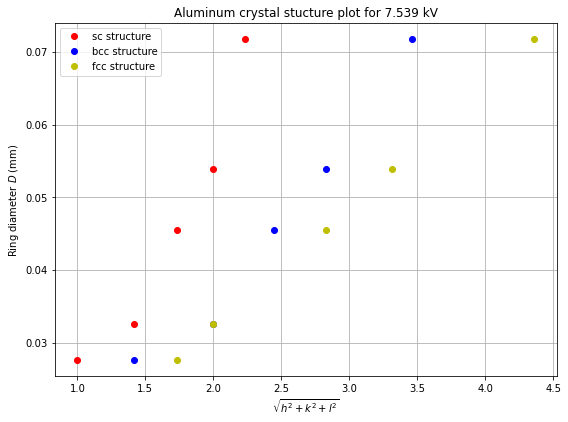

In [323]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('Aluminum crystal stucture plot for 7.539 kV')
plt.ylabel(r'Ring diameter $D$ (mm)')
plt.xlabel(r'$\sqrt{h^2+k^2+l^2}$')
plt.plot(x_sc,voltage6,'or',label='sc structure')
plt.plot(x_bcc,voltage6,'ob',label='bcc structure')
plt.plot(x_fcc,voltage6,'oy',label='fcc structure')
plt.legend()

## Part 4: Fit to the best structure

Then we can fit a line for each of theses arrays so that we can tell which one is the aluminum structure (although it is already clear at this point it is fcc)

line fit for sc:

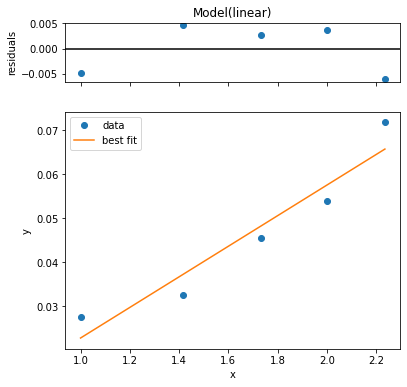

In [324]:
line = LinearModel()
param_guess = line.guess(voltage6, x = x_sc)
line_fit = line.fit(voltage6, param_guess, x = x_sc)
line_fit.plot();

line fit for bcc:

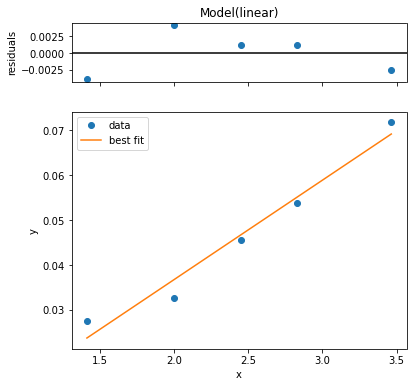

In [325]:
line = LinearModel()
param_guess = line.guess(voltage6, x = x_bcc)
line_fit = line.fit(voltage6, param_guess, x = x_bcc)
line_fit.plot();

line fit for fcc:

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 5
    # variables        = 2
    chi-square         = 4.8593e-07
    reduced chi-square = 1.6198e-07
    Akaike info crit   = -76.7331693
    Bayesian info crit = -77.5142935
    R-squared          = 0.99960940
[[Variables]]
    slope:      0.01668456 +/- 1.9042e-04 (1.14%) (init = 0.01668456)
    intercept: -0.00123022 +/- 5.7125e-04 (46.43%) (init = -0.001230223)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.949

Slope =  0.01668456274813947 +/- 0.0001904176464566421


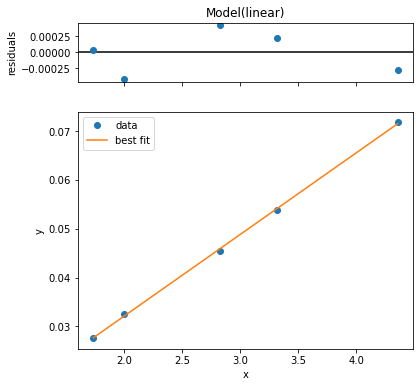

In [326]:
line = LinearModel()
param_guess = line.guess(voltage6, x = x_fcc)
line_fit = line.fit(voltage6, param_guess, x = x_fcc)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
line_fit.plot();

we can see that fcc is the most linear fit so we can from here calculate the lattice constant, which is given by $a=\lambda / (2 s)$, where s is the slope of the line, $\lambda = h/\sqrt{2mE}$, and $E$ is the energy of the electron. (below is calculated in relativistic units)

In [327]:
s = line_fit.params['slope'].value
m = const.value(u'electron mass energy equivalent in MeV')*1.0e6 # eV
h = const.value(u'Planck constant in eV s')*const.speed_of_light*1.0e10 # eV-A
energy = 7539 # in eV
w = h/np.sqrt(2*m*energy)
a = w/(2*s)# unit is in angstrom
print(a)

4.23291586473703


we can see that this value is close to 4, and slope from bcc makes this number closer to 3. Therefore, we have confirmed again that fcc is the correct structure.

## Part 5: Repeat the process for the other voltages

for voltage v1 to v5 and v7 we have:

In [328]:
voltage1 = np.array([ring1[0],ring2[0],ring3[0],ring4[0],ring5[0]])
voltage2 = np.array([ring1[1],ring2[1],ring3[1],ring4[1],ring5[1]])
voltage3 = np.array([ring1[2],ring2[2],ring3[2],ring4[2],ring5[2]])
voltage4 = np.array([ring1[3],ring2[3],ring3[3],ring4[3],ring5[3]])
voltage5 = np.array([ring1[4],ring2[4],ring3[4],ring4[4],ring5[4]])
voltage7 = np.array([ring1[6],ring2[6],ring3[6],ring4[6],ring5[6]])

get the slope for all of them:

In [329]:
line = LinearModel()
param_guess = line.guess(voltage1, x = x_fcc)
line_fit = line.fit(voltage1, param_guess, x = x_fcc)
s1 = line_fit.params['slope'].value

aram_guess = line.guess(voltage2, x = x_fcc)
line_fit = line.fit(voltage2, param_guess, x = x_fcc)
s2 = line_fit.params['slope'].value

aram_guess = line.guess(voltage3, x = x_fcc)
line_fit = line.fit(voltage3, param_guess, x = x_fcc)
s3 = line_fit.params['slope'].value

aram_guess = line.guess(voltage4, x = x_fcc)
line_fit = line.fit(voltage4, param_guess, x = x_fcc)
s4 = line_fit.params['slope'].value

aram_guess = line.guess(voltage5, x = x_fcc)
line_fit = line.fit(voltage5, param_guess, x = x_fcc)
s5 = line_fit.params['slope'].value

aram_guess = line.guess(voltage6, x = x_fcc)
line_fit = line.fit(voltage6, param_guess, x = x_fcc)
s6 = line_fit.params['slope'].value

aram_guess = line.guess(voltage7, x = x_fcc)
line_fit = line.fit(voltage7, param_guess, x = x_fcc)
s7 = line_fit.params['slope'].value

slopes = np.array([s1,s2,s3,s4,s5,s6,s7])
slopes

array([0.02264575, 0.02104692, 0.01890988, 0.01797582, 0.01728762,
       0.01668456, 0.01609582])

convert all the voltage into wavelength:

In [330]:
wavelength = h*np.reciprocal(np.sqrt(np.copy(al_data['voltage'])*2*m*1000))
wavelength

array([0.18276388, 0.17407061, 0.15894136, 0.1519442 , 0.14602379,
       0.1412487 , 0.1363959 ])

Plot the fitted slope above (which is wavelength/2a) as a function of wavelength, and then find the best fit line:

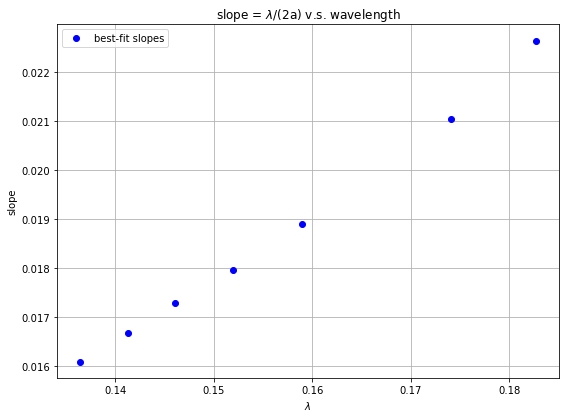

In [331]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('slope = $\lambda$/(2a) v.s. wavelength')
plt.ylabel(r'slope')
plt.xlabel(r'$\lambda$')
plt.plot(wavelength,slopes,'ob',label='best-fit slopes')
plt.legend()

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 7
    # variables        = 1
    chi-square         = 8.2598e-07
    reduced chi-square = 1.3766e-07
    Akaike info crit   = -109.668209
    Bayesian info crit = -109.722299
    R-squared          = 0.97604099
[[Variables]]
    slope:      0.11990792 +/- 8.9482e-04 (0.75%) (init = 0.1392714)
    intercept:  0 (fixed)

Slope =  0.11990792363285077 +/- 0.0008948154163589718


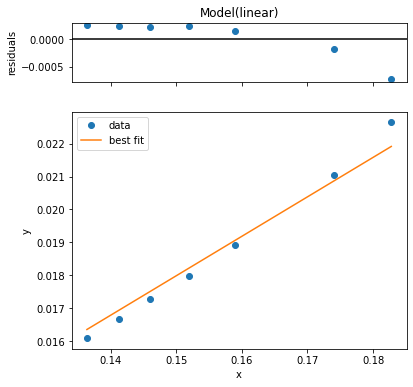

In [332]:
line = LinearModel()
param_guess = line.guess(slopes, x = wavelength)
param_guess['intercept'].value = 0
param_guess['intercept'].vary = False
line_fit = line.fit(slopes, param_guess, x = wavelength)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
final_slope = line_fit.params['slope'].value
line_fit.plot();

because the final best-fit slope represents 1/2a, we can get 'a' by calculating 1/(2 * final_slope):

In [333]:
final_a = 1/(2*final_slope)
print(final_a)

4.169866217773591


Note that this value is very close to the known value of a for aluminum, which is 4.05, with a relative error of only (4.17-4.05)/4.05=3.0%.